# 토마토 생산량과 기후요인 분석

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [188]:
df=pd.read_csv("농업기상관측.csv",encoding="cp949")

In [189]:
df

,지역,평균 : 1.5M 평균 습도(%),평균 : 10CM 일 토양수분(%),평균 : 20CM 일 토양수분(%),평균 : 30CM 일 토양수분(%),평균 : 50CM 일 토양수분(%),평균 : 1.5M 평균 기온(°C),평균 : 평균 지면온도(°C),평균 : 5CM 평균 지중온도(°C),평균 : 30CM 평균 지중온도(°C),평균 : 0.5M 일 지중온도(°C),평균 : 1.0M 일 지중온도(°C),최저기온(°C),최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),일조율(%),평균 풍속(m/s),합계 : 10a당 생산량 (kg)
0,경기북부,73.4,19.5,32.6,36.2,36.6,16.8,18.1,18.0,18.0,19.0,19.4,-21.7,35.1,1037.9,100.0,76.3,55.8,1.4,20806
1,인천광역시,73.2,11.3,16.2,15.8,10.5,13.7,14.9,16.3,16.7,16.9,14.3,-16.2,34.7,960.9,82.7,62.0,57.8,2.4,34010
2,전라남도,76.3,45.5,37.6,41.4,33.7,16.4,17.3,19.3,18.5,19.8,19.8,-19.7,35.8,1207.3,93.4,73.7,54.5,2.0,30259
3,충청남도,73.6,9.1,17.3,24.9,32.6,13.2,15.5,15.2,15.1,15.1,15.2,-18.6,36.3,1084.4,70.9,72.0,54.7,1.9,33270
4,경기남부,72.1,2.4,20.9,23.4,26.4,13.4,14.3,13.9,14.0,13.8,14.5,-15.8,36.0,974.0,65.3,66.8,54.2,1.6,20806
5,경상북도,73.2,20.3,5.4,11.0,17.6,12.6,14.3,14.9,15.2,14.8,15.2,-20.7,34.0,1162.2,63.7,73.9,49.2,1.2,31885
6,충청북도,77.0,24.3,25.1,25.7,26.3,13.0,15.0,15.6,15.2,15.1,15.2,-16.5,36.3,1496.6,88.7,68.4,51.1,1.6,31791
7,전라북도,75.7,23.0,30.7,31.1,31.2,13.9,15.4,14.9,15.1,15.0,14.6,-22.4,35.7,1115.3,79.4,78.7,59.9,1.3,32482
8,강원북부,72.7,11.5,13.5,10.9,12.7,10.7,12.6,11.6,11.3,10.9,10.4,-21.9,36.6,1045.9,69.7,69.6,51.7,1.4,28295
9,강원남부,72.1,14.7,11.2,4.4,12.8,11.8,14.0,14.4,14.6,14.3,14.6,-11.9,35.1,1708.3,279.2,73.9,52.8,3.0,28295


In [190]:
df.shape

(10, 20)

In [191]:
df.columns

Index(['지역', '평균 : 1.5M 평균 습도(%)', '평균 : 10CM 일 토양수분(%)',
       '평균 : 20CM 일 토양수분(%)', '평균 : 30CM 일 토양수분(%)', '평균 : 50CM 일 토양수분(%)',
       '평균 : 1.5M 평균 기온(°C)', '평균 : 평균 지면온도(°C)', '평균 : 5CM 평균 지중온도(°C)',
       '평균 : 30CM 평균 지중온도(°C)', '평균 : 0.5M 일 지중온도(°C)', '평균 : 1.0M 일 지중온도(°C)',
       '최저기온(°C)', '최고기온(°C)', '합계 강수량(mm)', '일 최다 강수량(mm)', '평균 상대습도(%)',
       '일조율(%)', '평균 풍속(m/s)', '합계 : 10a당 생산량 (kg)'],
      dtype='object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   지역                     10 non-null     object 
 1   평균 : 1.5M 평균 습도(%)     10 non-null     float64
 2   평균 : 10CM 일 토양수분(%)    10 non-null     float64
 3   평균 : 20CM 일 토양수분(%)    10 non-null     float64
 4   평균 : 30CM 일 토양수분(%)    10 non-null     float64
 5   평균 : 50CM 일 토양수분(%)    10 non-null     float64
 6   평균 : 1.5M 평균 기온(°C)    10 non-null     float64
 7   평균 : 평균 지면온도(°C)       10 non-null     float64
 8   평균 : 5CM 평균 지중온도(°C)   10 non-null     float64
 9   평균 : 30CM 평균 지중온도(°C)  10 non-null     float64
 10  평균 : 0.5M 일 지중온도(°C)   10 non-null     float64
 11  평균 : 1.0M 일 지중온도(°C)   10 non-null     float64
 12  최저기온(°C)               10 non-null     float64
 13  최고기온(°C)               10 non-null     float64
 14  합계 강수량(mm)             10 non-null     float64
 15  일 최다 강수량(

In [193]:
df.describe()

,평균 : 1.5M 평균 습도(%),평균 : 10CM 일 토양수분(%),평균 : 20CM 일 토양수분(%),평균 : 30CM 일 토양수분(%),평균 : 50CM 일 토양수분(%),평균 : 1.5M 평균 기온(°C),평균 : 평균 지면온도(°C),평균 : 5CM 평균 지중온도(°C),평균 : 30CM 평균 지중온도(°C),평균 : 0.5M 일 지중온도(°C),평균 : 1.0M 일 지중온도(°C),최저기온(°C),최고기온(°C),합계 강수량(mm),일 최다 강수량(mm),평균 상대습도(%),일조율(%),평균 풍속(m/s),합계 : 10a당 생산량 (kg)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,73.930000,18.160000,21.050000,22.480000,24.040000,13.550000,15.140000,15.41000,15.370000,15.470000,15.320000,-18.54000,35.560000,1179.280000,99.300000,71.53000,54.170000,1.780000,29189.900000
std,1.758819,11.779568,10.292311,11.902269,9.809429,1.866815,1.593877,2.13565,2.047247,2.565606,2.660743,3.38992,0.819485,240.909129,64.368143,4.91077,3.182609,0.563323,4808.233828
min,72.100000,2.400000,5.400000,4.400000,10.500000,10.700000,12.600000,11.60000,11.300000,10.900000,10.400000,-22.40000,34.000000,960.900000,63.700000,62.00000,49.200000,1.200000,20806.000000
25%,72.825000,11.350000,14.175000,12.200000,14.000000,12.700000,14.300000,14.52500,14.725000,14.425000,14.525000,-21.45000,35.100000,1039.900000,70.000000,68.70000,51.975000,1.400000,28295.000000
50%,73.300000,17.100000,19.100000,24.150000,26.350000,13.300000,14.950000,15.05000,15.150000,15.050000,14.900000,-19.15000,35.750000,1099.850000,81.050000,72.85000,54.350000,1.600000,31025.000000
75%,75.175000,22.325000,29.300000,29.750000,32.250000,13.850000,15.475000,16.12500,16.325000,16.450000,15.200000,-16.27500,36.225000,1196.025000,92.225000,73.90000,55.525000,1.975000,32332.750000
max,77.000000,45.500000,37.600000,41.400000,36.600000,16.800000,18.100000,19.30000,18.500000,19.800000,19.800000,-11.90000,36.600000,1708.300000,279.200000,78.70000,59.900000,3.000000,34010.000000


In [194]:
df.columns=["지역","1.5M_humidity","10cm_soil_moisture","20cm_soil_moisture",
"30cm_soil_moisture","50cm_soil_moisture","atmosphere_temp","ground_temp","5cm_soil_temp",
"30cm_soil_temp","50cm_soil_temp","1M_soil_temp","lowest_temp","highest_temp",
"precipitation","max_precipitation","rltv_humidity","sunshine","wind_speed","10a_production"]

비슷한 독립변수가 많으면 다중공선성 문제가 발생하기 때문에   
독립변수를   
습도, 토양수분, 평균 기온, 평균 지면 온도, 평균 지중온도, 최저기온, 최고기온,합계 강수량, 일 최다 강수량, 평균 상대습도, 일조율, 평균 풍속,  
만 남기자.

In [195]:
df=df.drop(["20cm_soil_moisture","30cm_soil_moisture",
"50cm_soil_moisture", "30cm_soil_temp","50cm_soil_temp","1M_soil_temp"
],axis=1)

In [196]:
df=df.drop("지역",axis=1)
df

,1.5M_humidity,10cm_soil_moisture,atmosphere_temp,ground_temp,5cm_soil_temp,lowest_temp,highest_temp,precipitation,max_precipitation,rltv_humidity,sunshine,wind_speed,10a_production
0,73.4,19.5,16.8,18.1,18.0,-21.7,35.1,1037.9,100.0,76.3,55.8,1.4,20806
1,73.2,11.3,13.7,14.9,16.3,-16.2,34.7,960.9,82.7,62.0,57.8,2.4,34010
2,76.3,45.5,16.4,17.3,19.3,-19.7,35.8,1207.3,93.4,73.7,54.5,2.0,30259
3,73.6,9.1,13.2,15.5,15.2,-18.6,36.3,1084.4,70.9,72.0,54.7,1.9,33270
4,72.1,2.4,13.4,14.3,13.9,-15.8,36.0,974.0,65.3,66.8,54.2,1.6,20806
5,73.2,20.3,12.6,14.3,14.9,-20.7,34.0,1162.2,63.7,73.9,49.2,1.2,31885
6,77.0,24.3,13.0,15.0,15.6,-16.5,36.3,1496.6,88.7,68.4,51.1,1.6,31791
7,75.7,23.0,13.9,15.4,14.9,-22.4,35.7,1115.3,79.4,78.7,59.9,1.3,32482
8,72.7,11.5,10.7,12.6,11.6,-21.9,36.6,1045.9,69.7,69.6,51.7,1.4,28295
9,72.1,14.7,11.8,14.0,14.4,-11.9,35.1,1708.3,279.2,73.9,52.8,3.0,28295


In [197]:
# 변수 분포 확인
sns.pairplot(df)

c:\Users\JK\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


#### 변수 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled= pd.DataFrame(df_scaled,columns=df.columns)
df=df_scaled

<AxesSubplot:>

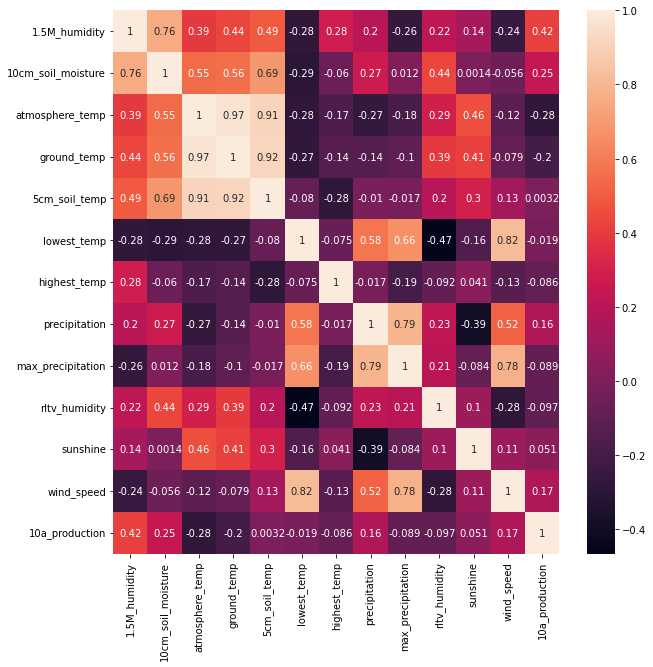

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.corr()["10a_production"].sort_values() 

atmosphere_temp      -0.276913
ground_temp          -0.197633
rltv_humidity        -0.096828
max_precipitation    -0.088511
highest_temp         -0.085709
lowest_temp          -0.019378
5cm_soil_temp         0.003153
sunshine              0.050936
precipitation         0.164146
wind_speed            0.165932
10cm_soil_moisture    0.248792
1.5M_humidity         0.420936
10a_production        1.000000
Name: 10a_production, dtype: float64

### 상관계수가 매우 낮게 나오는 것을 보아 회귀분석을 통해 의미 있는 피처를 추출하기 어려울 것으로 보인다.

피처데이터 레이블 데이터 생성

In [ ]:
X=df.iloc[:,:-1] #10a_production 제외
y=df.iloc[:,-1] #10a_production

### 다중공선성 분석


ols 검정

In [ ]:
model= sm.OLS(y,X)
model_fit= model.fit()
model_fit.summary()

c:\Users\JK\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\JK\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\JK\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\JK\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         10a_production   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                nan
Time:                        23:13:42   Log-Likelihood:                 336.74
No. Observations:                  10   AIC:                            -653.5
Df Residuals:                       0   BIC:                            -650.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
1.5M_humidity         -0.8357        inf         -0        nan         nan         nan
10cm_soil_moisture    -0.0513        inf         -0        nan         nan         nan
atmosphere_temp       -2.9804        inf         -0        nan         nan         nan
ground_temp           -0.5936        inf         -0        nan         nan         nan
5cm_soil_temp          3.5335        inf          0        nan         nan         nan
lowest_temp           -0.6503        inf         -0        nan         nan         nan
highest_temp           0.0635        inf          0        nan         nan         nan
precipitation          1.9220        inf          0        nan         nan         nan
max_precipitation     -2.4593        inf         -0        nan         nan         nan
rltv_humidity          0.3271        inf          0        nan         nan         nan
sunshine               1.2605        inf          0        nan         nan         nan
wind_speed             0.4890        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        3.423   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                1.023
Skew:                          -0.056   Prob(JB):                        0.600
Kurtosis:                       1.437   Cond. No.                         77.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

데이터의 수가 모수적 검정을 하기에 충분치 않아서 inf가 나오는 것을 볼 수 있다.

따라서 기상 요인은 데이터 부족으로 인하여 제외하고  
생육 데이터 회귀분석을 통해 중요한 생육변수를 파악하도록 하자.

In [ ]:
df= pd.read_csv("tomato_growth.csv",encoding="cp949")

In [ ]:
df.head()

,조사일,주차,생장길이(cm),화방높이(cm),줄기굵기(mm),엽장(cm),엽폭(cm),엽수(개),개화군(점),착과군(점),최종화방번호(번),열매수(개)
0,2021-12-15,18,0.0,305.0,6.16,347.5,217.5,18.25,11.59,11.50,12.50,10.50
1,2021-12-21,19,352.5,265.0,8.51,372.5,275.0,16.50,12.14,12.00,13.00,11.00
2,2021-12-29,20,245.0,150.0,7.40,355.0,230.0,13.50,12.46,11.69,13.25,9.75
3,2022-01-05,21,175.0,327.5,11.14,392.5,342.5,12.25,13.02,13.38,13.75,13.25
4,2022-01-12,22,270.0,207.5,9.17,382.5,335.0,12.75,14.13,13.75,14.75,14.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   조사일        14 non-null     object 
 1   주차         14 non-null     int64  
 2   생장길이(cm)   14 non-null     float64
 3   화방높이(cm)   14 non-null     float64
 4   줄기굵기(mm)   14 non-null     float64
 5   엽장(cm)     14 non-null     float64
 6   엽폭(cm)     14 non-null     float64
 7   엽수(개)      14 non-null     float64
 8   개화군(점)     14 non-null     float64
 9   착과군(점)     14 non-null     float64
 10  최종화방번호(번)  14 non-null     float64
 11  열매수(개)     14 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df.shape

(14, 12)

In [ ]:
from sklearn.linear_model import LinearRegression()
lr= LinearRegression()
lr.fit(df.iloc[])

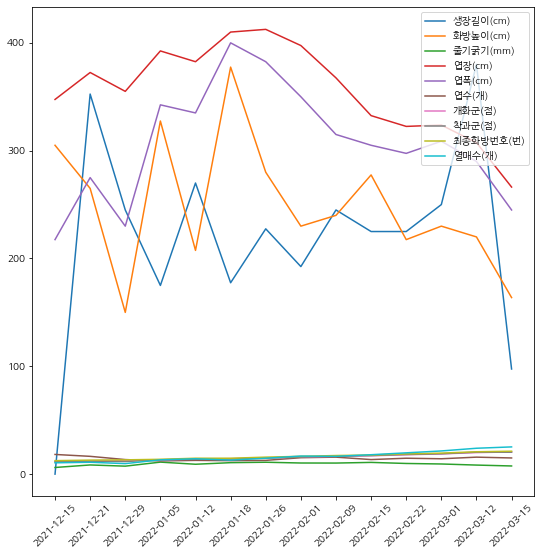

In [ ]:
plt.figure(figsize=(9,9))
date=df.iloc[:,0]
for i in range(2,len(df.columns)):
    plt.plot(date,df.iloc[:,i], label=df.columns[i])
plt.rc('font',family='NanumGothic') # 한글 출력을 위해
plt.xticks(rotation=45)
plt.legend()
plt.show()

변수들의 시간에 따른 변화를 보면 줄기굵기, 최종화방번호, 엽수 가 타겟 변수인 열매 수와  
매우 유사한 움직임을 보이는 것을 알 수 있다.

따라서 해당 변수들만으로 회귀분석을 해보자.